<a href="https://colab.research.google.com/github/zhrnnsw/Machine-Learning/blob/main/week-11/Praktikum_Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum Pertemuan 11 - Convolutional Neural Network (CNN)**
---


> Nama: Zahra Annisa Wahono
>
> Kelas: TI-3H / 29
>
> NIM: 2141720016

### **Praktikum 1 - Klasifikasi Kucing dan Anjing**

**Deskripsi**

Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

**Dataset**

Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.

### **Langkah 1 - Import Library**

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/dataset.zip or
        /content/dataset.zip.zip, and cannot find /content/dataset.zip.ZIP, period.


### **Langkah 2 - Pra Pengolahan Data**

Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

**Langkah 2.1. Pra Pengolahan Data Training**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Semester 5/Machine Learning/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


**Langkah 2.2. Pra Pengolahan Data Testing**

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Semester 5/Machine Learning/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### **Langkah 3 - Pembuatan Model CNN**

**Langkah 3.1.  - Inisiasi Model CNN**

In [ ]:
cnn = tf.keras.models.Sequential()

**Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Langkah 3.3 - Pembuatan Layer Pooling 1**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.5 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

**Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Langkah 3.8 - Compile Model CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Langkah 4 - Fit CNN**

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 1732s 7s/step - loss: 0.6540 - accuracy: 0.6183 - val_loss: 0.5966 - val_accuracy: 0.6865
Epoch 2/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5878 - accuracy: 0.6852 - val_loss: 0.5226 - val_accuracy: 0.7455
Epoch 3/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5461 - accuracy: 0.7165 - val_loss: 0.5400 - val_accuracy: 0.7305
Epoch 4/25
250/250 [==============================] - 43s 172ms/step - loss: 0.5190 - accuracy: 0.7401 - val_loss: 0.4899 - val_accuracy: 0.7685
Epoch 5/25
250/250 [==============================] - 38s 152ms/step - loss: 0.4850 - accuracy: 0.7629 - val_loss: 0.5756 - val_accuracy: 0.7145
Epoch 6/25
250/250 [==============================] - 38s 151ms/step - loss: 0.4670 - accuracy: 0.7749 - val_loss: 0.4724 - val_accuracy: 0.7850
Epoch 7/25
250/250 [==============================] - 38s 150ms/step - loss: 0.4553 - accuracy: 0.7800 - val_loss: 0.4742 - val_acc

### **Langkah 5 - Prediksi dengan 1 Citra**

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Semester 5/Machine Learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 18ms/step
dog


## **Praktikum 2 - Klasifikasi Multi-label dengan Data CIFAR**

**Desclaimer**: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn

**Deskripsi**

Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.


### **Langkah 1 - Load Library**

In [163]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **Langkah 2 - Unduh Dataset CIFAR**

In [164]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### **Langkah 3 - Verifikasi Data**

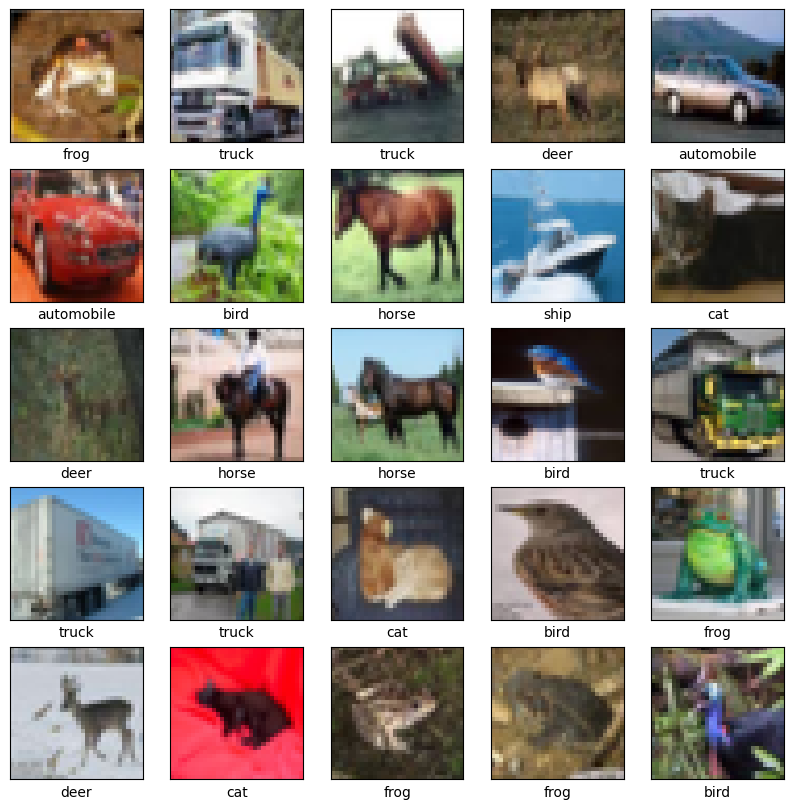

In [165]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
     # The CIFAR labels happen to be arrays,
     # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [166]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [167]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 563

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [168]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [169]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
 flatten_26 (Flatten)        (None, 1024)            

**Langkah 4.5. - Compile Model CNN**

In [170]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### **Langkah 5 - Fit Model**

In [171]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5135 - accuracy: 0.4482 - val_loss: 1.2595 - val_accuracy: 0.5504
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1698 - accuracy: 0.5879 - val_loss: 1.1509 - val_accuracy: 0.5959
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0265 - accuracy: 0.6392 - val_loss: 0.9956 - val_accuracy: 0.6505
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9181 - accuracy: 0.6783 - val_loss: 0.9425 - val_accuracy: 0.6729
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8470 - accuracy: 0.7041 - val_loss: 0.9038 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7832 - accuracy: 0.7243 - val_loss: 0.8750 - val_accuracy: 0.6955
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7350 - accuracy: 0.7449 - val_loss: 0.8494 - val_accuracy

### **Langkah 6 - Evaluasi Model**

313/313 - 1s - loss: 0.8305 - accuracy: 0.7189 - 686ms/epoch - 2ms/step


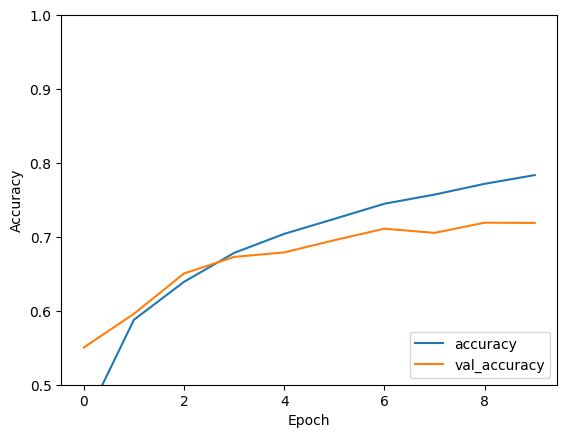

In [172]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### **Langkah 7 - Cetak Hasil Akurasi**

In [173]:
print(test_acc)

0.7189000248908997


## **Tugas Praktikum**

**Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

In [139]:
model_2 =  models.Sequential()

model_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_105 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_106 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_107 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                               

In [141]:
history = model_2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 13s 6ms/step - loss: 1.4760 - accuracy: 0.4580 - val_loss: 1.0966 - val_accuracy: 0.6051
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9585 - accuracy: 0.6590 - val_loss: 0.8660 - val_accuracy: 0.6983
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7693 - accuracy: 0.7278 - val_loss: 0.7893 - val_accuracy: 0.7268
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6437 - accuracy: 0.7731 - val_loss: 0.7378 - val_accuracy: 0.7535
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5548 - accuracy: 0.8027 - val_loss: 0.7419 - val_accuracy: 0.7524
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4737 - accuracy: 0.8321 - val_loss: 0.7382 - val_accuracy: 0.7607
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4102 - accuracy: 0.8536 - val_loss: 0.7459 - val_accuracy: 0.76

313/313 - 1s - loss: 0.8996 - accuracy: 0.7602 - 987ms/epoch - 3ms/step


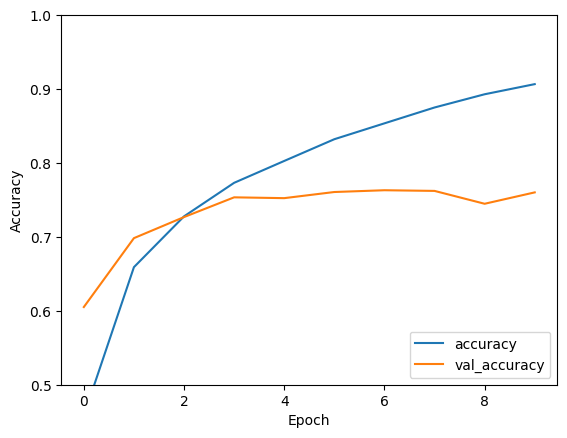

In [142]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_2.evaluate(test_images, test_labels, verbose=2)

In [148]:
model_3 =  models.Sequential()

model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(1024, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(512, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_125 (Conv2D)         (None, 30, 30, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                     

In [150]:
history = model_3.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 28s 14ms/step - loss: 1.2639 - accuracy: 0.5593 - val_loss: 1.0460 - val_accuracy: 0.6480
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7807 - accuracy: 0.7313 - val_loss: 0.8078 - val_accuracy: 0.7214
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6062 - accuracy: 0.7938 - val_loss: 0.7414 - val_accuracy: 0.7505
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.4883 - accuracy: 0.8335 - val_loss: 0.6147 - val_accuracy: 0.7951
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.3854 - accuracy: 0.8672 - val_loss: 0.5495 - val_accuracy: 0.8171
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3122 - accuracy: 0.8926 - val_loss: 0.6154 - val_accuracy: 0.8006
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2484 - accuracy: 0.9122 - val_loss: 0.5225 - val_accura

313/313 - 1s - loss: 0.6215 - accuracy: 0.8344 - 1s/epoch - 4ms/step


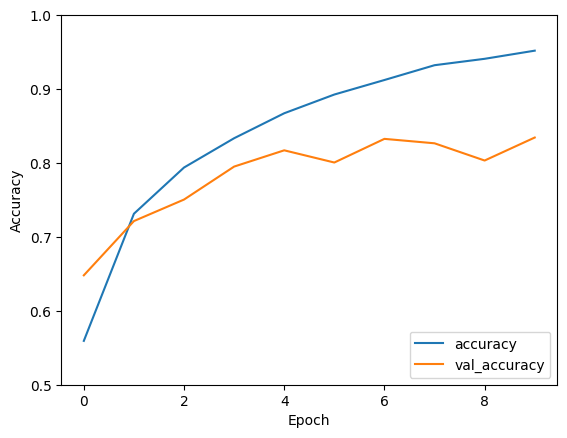

In [151]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_3.evaluate(test_images, test_labels, verbose=2)

**Buatlah model CNN untuk klasifikasi dataset MNIST.**

In [152]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 7s 5ms/step - loss: 0.1852 - accuracy: 0.9434 - val_loss: 0.0477 - val_accuracy: 0.9841
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0451 - val_accuracy: 0.9851
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0283 - val_accuracy: 0.9911
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9928
Test accuracy: 0.9927999973297119
